# 导入文件

In [3]:
%matplotlib inline
%load_ext nb_black
import matplotlib.pyplot as plt
import matplotlib as mpl

from numpy import *
import numpy as np

import pyemma
from pyemma.util.contexts import settings
import pyemma.plots as mplt
import pyemma.msm as msm

from __future__ import print_function
import mdtraj
import mdtraj as md

from tqdm import tqdm
from time import sleep

# import mdshare

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [7]:
# 导入轨迹文件
# pdb = "../6wuu.pdb"
# files = "../md_dry_jump_center_mol_center_fit.trr"
# files = "/home/sean/Desktop/Share/plpro_result/MSM/mix_zong_acn/zong.trr"
pdb = "/home/sean/Desktop/disk/cadd/MSM/zong-nma-msm/nma_top.pdb"
files = "/home/sean/Desktop/disk/cadd/MSM/zong-nma-msm/zong-msm-align.trr"
# files = (
#    "/home/sean/Desktop/disk/cadd/MSM/zong-nma-msm/md_dry_jump_center_mol_center_fit1.trr",
#    "/home/sean/Desktop/disk/cadd/MSM/zong-nma-msm/md_dry_jump_center_mol_center_fit2.trr",
#    "/home/sean/Desktop/disk/cadd/MSM/zong-nma-msm/md_dry_jump_center_mol_center_fit3.trr",
#    "/home/sean/Desktop/disk/cadd/MSM/zong-nma-msm/md_dry_jump_center_mol_center_fit4.trr",
#    "/home/sean/Desktop/disk/cadd/MSM/zong-nma-msm/md_dry_jump_center_mol_center_fit5.trr",
#    "/home/sean/Desktop/disk/cadd/MSM/zong-nma-msm/md_dry_jump_center_mol_center_fit6.trr",
#    "/home/sean/Desktop/disk/cadd/MSM/zong-nma-msm/md_dry_jump_center_mol_center_fit7.trr",
#    "/home/sean/Desktop/disk/cadd/MSM/zong-nma-msm/md_dry_jump_center_mol_center_fit8.trr",
#    "/home/sean/Desktop/disk/cadd/MSM/zong-nma-msm/md_dry_jump_center_mol_center_fit9.trr",
#    "/home/sean/Desktop/disk/cadd/MSM/zong-nma-msm/md_dry_jump_center_mol_center_fit10.trr",
# )
# print(pdb)
print(files)

# 定义mdtraj
traj = md.load(pdb, files)
topology = traj.topology
print(traj)
print(topology)

/home/sean/Desktop/disk/cadd/MSM/zong-nma-msm/zong-msm-align.trr
<mdtraj.Trajectory with 1 frames, 4969 atoms, 316 residues, and unitcells>
<mdtraj.Topology with 1 chains, 316 residues, 4969 atoms, 4865 bonds>


<IPython.core.display.Javascript object>

# 选择评分残基

## 选定残基

In [13]:
# 残基选择修正
selected_resi = [
    164,
    165,
    166,
    246,
    247,
    248,
    264,
    273,
    301,
    302,
    164,
    165,
    166,
    246,
    247,
    248,
    264,
    273,
    301,
    302,
]
# selected_resi = [12, 13, 71, 72, 83, 131, 132, 134, 135, 138, 146, 150]
selected_resi_xiu = np.array(selected_resi) - 1
print(selected_resi_xiu)

[163 164 165 245 246 247 263 272 300 301 163 164 165 245 246 247 263 272
 300 301]


<IPython.core.display.Javascript object>

In [14]:
# 选定残基

# add_sidechain_torsions (same to chi1 angle)
torsions_feat = pyemma.coordinates.featurizer(pdb)
torsions_feat.add_sidechain_torsions(
    selstr="name CA and resi 163 164 165 245 246 247 263 272 300 301 163 164 165 245 246 247 263 272 300 301",
    cossin=True,
    periodic=False,
)
torsions_data = pyemma.coordinates.load(files, features=torsions_feat)
labels = ["backbone\ntorsions"]
torsions_feat.describe()
# type(torsions_feat)
# type(torsions_data)

# 残基坐标
active_residue = [
    164,
    165,
    166,
    246,
    247,
    248,
    264,
    273,
    301,
    302,
    164,
    165,
    166,
    246,
    247,
    248,
    264,
    273,
    301,
    302,
]
active_residue1 = np.array(active_residue) - 1
positions_feat = pyemma.coordinates.featurizer(pdb)
positions_feat.add_residue_COM(active_residue1)
positions_data = pyemma.coordinates.load(files, features=positions_feat)
labels += ["backbone atom\npositions"]
positions_feat.describe()

# 配对原子距离
active_atom = topology.select(
    "name CA and resi 163 164 165 245 246 247 263 272 300 301 163 164 165 245 246 247 263 272 300 301"
)
distances_feat = pyemma.coordinates.featurizer(pdb)
distances_feat.add_distances(
    distances_feat.pairs(active_atom, excluded_neighbors=2), periodic=False
)
distances_data = pyemma.coordinates.load(files, features=distances_feat)
labels += ["backbone atom\ndistances"]
distances_feat.describe()

/home/sean/miniconda3/envs/env_py3.8/lib/python3.8/site-packages/pyemma/coordinates/data/featurization/angles.py:211: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  indices = np.vstack(valid.values())


['DIST: ASP 164 CA 2577 - VAL 165 CA 2589',
 'DIST: ASP 164 CA 2577 - ARG 166 CA 2605',
 'DIST: ASP 164 CA 2577 - ALA 246 CA 3868',
 'DIST: ASP 164 CA 2577 - PRO 247 CA 3880',
 'DIST: ASP 164 CA 2577 - PRO 248 CA 3894',
 'DIST: ASP 164 CA 2577 - TYR 264 CA 4129',
 'DIST: ASP 164 CA 2577 - TYR 273 CA 4259',
 'DIST: ASP 164 CA 2577 - THR 301 CA 4707',
 'DIST: ASP 164 CA 2577 - ASP 302 CA 4721',
 'DIST: VAL 165 CA 2589 - ARG 166 CA 2605',
 'DIST: VAL 165 CA 2589 - ALA 246 CA 3868',
 'DIST: VAL 165 CA 2589 - PRO 247 CA 3880',
 'DIST: VAL 165 CA 2589 - PRO 248 CA 3894',
 'DIST: VAL 165 CA 2589 - TYR 264 CA 4129',
 'DIST: VAL 165 CA 2589 - TYR 273 CA 4259',
 'DIST: VAL 165 CA 2589 - THR 301 CA 4707',
 'DIST: VAL 165 CA 2589 - ASP 302 CA 4721',
 'DIST: ARG 166 CA 2605 - ALA 246 CA 3868',
 'DIST: ARG 166 CA 2605 - PRO 247 CA 3880',
 'DIST: ARG 166 CA 2605 - PRO 248 CA 3894',
 'DIST: ARG 166 CA 2605 - TYR 264 CA 4129',
 'DIST: ARG 166 CA 2605 - TYR 273 CA 4259',
 'DIST: ARG 166 CA 2605 - THR 30

<IPython.core.display.Javascript object>

## 单段评分

In [7]:
# 单段评分

# add_sidechain_torsions (same to chi1 angle)
torsions_feat = pyemma.coordinates.featurizer(pdb)
torsions_feat.add_sidechain_torsions(
    selstr="name CA and resi 259 to 289", cossin=True, periodic=False
)
torsions_data = pyemma.coordinates.load(files, features=torsions_feat)
labels = ["backbone\ntorsions"]
# torsions_feat.describe()
# type(torsions_feat)
# type(torsions_data)

# 残基坐标
active_residue1 = arange(259, 290)
positions_feat = pyemma.coordinates.featurizer(pdb)
positions_feat.add_residue_COM(active_residue1)
positions_data = pyemma.coordinates.load(files, features=positions_feat)
labels += ["backbone atom\npositions"]
# positions_feat.describe()

# 配对原子距离
active_atom = topology.select("name CA and resi 259 to 289")
distances_feat = pyemma.coordinates.featurizer(pdb)
distances_feat.add_distances(
    distances_feat.pairs(active_atom, excluded_neighbors=2), periodic=False
)
distances_data = pyemma.coordinates.load(files, features=distances_feat)
labels += ["backbone atom\ndistances"]
# distances_feat.describe()

ValueError: xyz must be shape (Any, 17414, 3). You supplied  (1, 4969, 3)

<IPython.core.display.Javascript object>

## 多段评分

In [3]:
# 多段评分

# 多段扭转角
active_resi1 = "resi 100 to 120"
active_resi2 = "resi 259 to 290"
torsions_feat = pyemma.coordinates.featurizer(pdb)
torsions_feat.add_sidechain_torsions(selstr=active_resi1, cossin=True, periodic=False)
torsions_feat.add_sidechain_torsions(selstr=active_resi2, cossin=True, periodic=False)
torsions_data = pyemma.coordinates.load(files, features=torsions_feat)
labels = ["backbone\ntorsions"]
# torsions_feat.describe()

# 多段残基坐标
active_residue1 = arange(99, 120)
active_residue2 = arange(259, 290)
active_residue = list(active_residue1) + list(active_residue2)
positions_feat = pyemma.coordinates.featurizer(pdb)
positions_feat.add_residue_COM(active_residue)
positions_data = pyemma.coordinates.load(files, features=positions_feat)
labels += ["backbone atom\npositions"]
# positions_feat.describe()

# 多段配对原子距离
active_atom1 = topology.select("name CA and resi 99 to 120")
active_atom2 = topology.select("name CA and resi 259 to 290")
distances_feat = pyemma.coordinates.featurizer(pdb)
distances_feat.add_distances(
    distances_feat.pairs(active_atom1, excluded_neighbors=2), periodic=False
)
distances_feat.add_distances(
    distances_feat.pairs(active_atom2, excluded_neighbors=2), periodic=False
)
distances_data = pyemma.coordinates.load(files, features=distances_feat)
labels += ["backbone atom\ndistances"]
# distances_feat.describe()

/home/sean/.local/lib/python3.8/site-packages/pyemma/coordinates/data/featurization/angles.py:211: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  indices = np.vstack(valid.values())


Obtaining file info:   0%|                               | 0/10 [00:00<?, ?it/s]

getting output of FeatureReader:   0%|                   | 0/10 [00:00<?, ?it/s]

Obtaining file info:   0%|                               | 0/10 [00:00<?, ?it/s]

getting output of FeatureReader:   0%|                   | 0/10 [00:00<?, ?it/s]

Obtaining file info:   0%|                               | 0/10 [00:00<?, ?it/s]

getting output of FeatureReader:   0%|                   | 0/10 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

In [8]:
# nma多段扭转角
# 106 - 119, 162 - 174，205 - 212, 243 - 251, 260 - 277 , 297 - 304

active_resi1 = "resi 105 to 118"
active_resi2 = "resi 161 to 173"
active_resi3 = "resi 204 to 211"
active_resi4 = "resi 242 to 250"
active_resi5 = "resi 259 to 276"
active_resi6 = "resi 296 to 303"

torsions_feat = pyemma.coordinates.featurizer(pdb)
torsions_feat.add_sidechain_torsions(selstr=active_resi1, cossin=True, periodic=False)
torsions_feat.add_sidechain_torsions(selstr=active_resi2, cossin=True, periodic=False)
torsions_feat.add_sidechain_torsions(selstr=active_resi3, cossin=True, periodic=False)
torsions_feat.add_sidechain_torsions(selstr=active_resi4, cossin=True, periodic=False)
torsions_feat.add_sidechain_torsions(selstr=active_resi5, cossin=True, periodic=False)
torsions_feat.add_sidechain_torsions(selstr=active_resi6, cossin=True, periodic=False)


torsions_data = pyemma.coordinates.load(files, features=torsions_feat)
labels = ["backbone\ntorsions"]
torsions_feat.describe()

# nma多段残基坐标
# 106 - 119, 162 - 174，205 - 212, 243 - 251, 260 - 277 , 297 - 304
active_residue1 = arange(105, 119)
active_residue2 = arange(161, 174)
active_residue3 = arange(204, 212)
active_residue4 = arange(242, 251)
active_residue5 = arange(259, 277)
active_residue6 = arange(296, 304)

active_residue = (
    list(active_residue1)
    + list(active_residue2)
    + list(active_residue3)
    + list(active_residue4)
    + list(active_residue5)
    + list(active_residue6)
)
positions_feat = pyemma.coordinates.featurizer(pdb)
positions_feat.add_residue_COM(active_residue)
positions_data = pyemma.coordinates.load(files, features=positions_feat)
labels += ["backbone atom\npositions"]
positions_feat.describe()

# nma多段配对原子距离
# 106 - 119, 162 - 174，205 - 212, 243 - 251, 260 - 277 , 297 - 304
active_atom1 = topology.select("name CA and resi 105 to 118")
active_atom2 = topology.select("name CA and resi 161 to 173")
active_atom3 = topology.select("name CA and resi 204 to 211")
active_atom4 = topology.select("name CA and resi 242 to 250")
active_atom5 = topology.select("name CA and resi 259 to 276")
active_atom6 = topology.select("name CA and resi 296 to 303")

distances_feat = pyemma.coordinates.featurizer(pdb)
distances_feat.add_distances(
    distances_feat.pairs(active_atom1, excluded_neighbors=2), periodic=False
)
distances_feat.add_distances(
    distances_feat.pairs(active_atom2, excluded_neighbors=2), periodic=False
)
distances_feat.add_distances(
    distances_feat.pairs(active_atom3, excluded_neighbors=2), periodic=False
)
distances_feat.add_distances(
    distances_feat.pairs(active_atom4, excluded_neighbors=2), periodic=False
)
distances_feat.add_distances(
    distances_feat.pairs(active_atom5, excluded_neighbors=2), periodic=False
)
distances_feat.add_distances(
    distances_feat.pairs(active_atom6, excluded_neighbors=2), periodic=False
)
distances_data = pyemma.coordinates.load(files, features=distances_feat)
labels += ["backbone atom\ndistances"]
distances_feat.describe()

/home/sean/miniconda3/envs/env_py3.8/lib/python3.8/site-packages/pyemma/coordinates/data/featurization/angles.py:211: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  indices = np.vstack(valid.values())


['DIST: TRP 106 CA 1688 - ALA 107 CA 1712',
 'DIST: TRP 106 CA 1688 - ASP 108 CA 1722',
 'DIST: TRP 106 CA 1688 - ASN 109 CA 1734',
 'DIST: TRP 106 CA 1688 - ASN 110 CA 1748',
 'DIST: TRP 106 CA 1688 - CYS 111 CA 1762',
 'DIST: TRP 106 CA 1688 - TYR 112 CA 1773',
 'DIST: TRP 106 CA 1688 - LEU 113 CA 1794',
 'DIST: TRP 106 CA 1688 - ALA 114 CA 1813',
 'DIST: TRP 106 CA 1688 - THR 115 CA 1823',
 'DIST: TRP 106 CA 1688 - ALA 116 CA 1837',
 'DIST: TRP 106 CA 1688 - LEU 117 CA 1847',
 'DIST: TRP 106 CA 1688 - LEU 118 CA 1866',
 'DIST: TRP 106 CA 1688 - THR 119 CA 1885',
 'DIST: ALA 107 CA 1712 - ASP 108 CA 1722',
 'DIST: ALA 107 CA 1712 - ASN 109 CA 1734',
 'DIST: ALA 107 CA 1712 - ASN 110 CA 1748',
 'DIST: ALA 107 CA 1712 - CYS 111 CA 1762',
 'DIST: ALA 107 CA 1712 - TYR 112 CA 1773',
 'DIST: ALA 107 CA 1712 - LEU 113 CA 1794',
 'DIST: ALA 107 CA 1712 - ALA 114 CA 1813',
 'DIST: ALA 107 CA 1712 - THR 115 CA 1823',
 'DIST: ALA 107 CA 1712 - ALA 116 CA 1837',
 'DIST: ALA 107 CA 1712 - LEU 11

<IPython.core.display.Javascript object>

# 打分

## 对比

100%|███████████████████████████████████████████| 10/10 [00:18<00:00,  1.87s/it]

[1.00145065 1.00153126 1.0015173  1.00155628 1.00151441 1.00150915
 1.00147954 1.00157212 1.00146807 1.00145833]
[1.04132293 1.04120528 1.04138313 1.04122757 1.04125841 1.04126599
 1.04125478 1.04121287 1.04119583 1.04110075]
[1.00003493 1.00003506 1.00003574 1.00003578 1.00003488 1.00003552
 1.00003637 1.00003657 1.00003486 1.0000353 ]


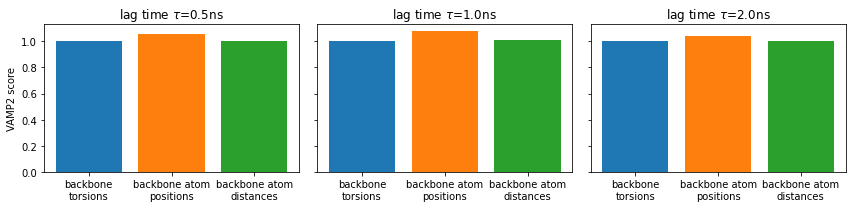

<IPython.core.display.Javascript object>

In [9]:
import os

os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"


def score_cv(data, dim, lag, number_of_splits=10, validation_fraction=0.5):
    """Compute a cross-validated VAMP2 score.

    We randomly split the list of independent trajectories into
    a training and a validation set, compute the VAMP2 score,
    and repeat this process several times.

    Parameters
    ----------
    data : list of numpy.ndarrays
        The input data.
    dim : int
        Number of processes to score; equivalent to the dimension
        after projecting the data with VAMP2.
    lag : int
        Lag time for the VAMP2 scoring.
    number_of_splits : int, optional, default=10
        How often do we repeat the splitting and score calculation.
    validation_fraction : int, optional, default=0.5
        Fraction of trajectories which should go into the validation
        set during a split.
    """
    # we temporarily suppress very short-lived progress bars
    with pyemma.util.contexts.settings(show_progress_bars=False):
        nval = int(len(data) * validation_fraction)
        scores = np.zeros(number_of_splits)
        for n in tqdm(range(number_of_splits), ncols=80, colour="blue"):
            sleep(0.05)
            ival = np.random.choice(len(data), size=nval, replace=False)
            vamp = pyemma.coordinates.vamp(
                [d for i, d in enumerate(data) if i not in ival], lag=lag, dim=dim
            )
            scores[n] = vamp.score([d for i, d in enumerate(data) if i in ival])
    return scores


dim = 1
# 记得轨迹条数！

fig, axes = plt.subplots(1, 3, figsize=(12, 3), sharey=True)
for ax, lag in zip(axes.flat, [5, 10, 20]):
    torsions_scores = score_cv(torsions_data, lag=lag, dim=dim)
    scores = [torsions_scores.mean()]
    errors = [torsions_scores.std()]
    positions_scores = score_cv(positions_data, lag=lag, dim=dim)
    scores += [positions_scores.mean()]
    errors += [positions_scores.std()]
    distances_scores = score_cv(distances_data, lag=lag, dim=dim)
    scores += [distances_scores.mean()]
    errors += [distances_scores.std()]
    ax.bar(labels, scores, yerr=errors, color=["C0", "C1", "C2"])
    ax.set_title(r"lag time $\tau$={:.1f}ns".format(lag * 0.1))
    if lag == 5:
        # save for later
        vamp_bars_plot = dict(
            labels=labels, scores=scores, errors=errors, dim=dim, lag=lag
        )
axes[0].set_ylabel("VAMP2 score")
fig.tight_layout()

print(torsions_scores)
print(positions_scores)
print(distances_scores)

# 趋势线

## 单段轨迹

bar: 0it [00:00, ?it/s]
100%|███████████████████████████████████████████| 10/10 [00:17<00:00,  1.77s/it]
bar: 1it [00:17, 17.72s/it]
100%|███████████████████████████████████████████| 10/10 [00:17<00:00,  1.78s/it]
bar: 2it [00:35, 17.78s/it]
100%|███████████████████████████████████████████| 10/10 [00:17<00:00,  1.78s/it]
bar: 3it [00:53, 17.79s/it]
100%|███████████████████████████████████████████| 10/10 [00:17<00:00,  1.77s/it]
bar: 4it [01:11, 17.79s/it]
  0%|                                                    | 0/10 [00:00<?, ?it/s]
bar: 4it [01:11, 17.83s/it]


ValueError: None single dataset [longest=18] is longer than lag+skip [20].

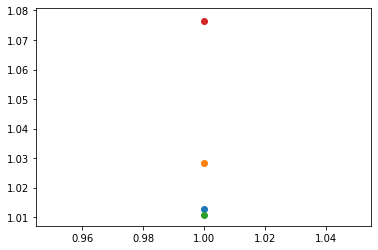

<IPython.core.display.Javascript object>

In [17]:
import os

os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

lags = [1, 2, 5, 10, 20]

# 轨迹条数 range(n)
dims = 1

fig, ax = plt.subplots()
for i, lag in tqdm(enumerate(lags), ncols=80, desc="bar", colour="blue"):
    sleep(0.05)
    scores_ = np.array([score_cv(torsions_data, dim, lag)])  # 改目标
    scores = np.mean(scores_, axis=1)
    errors = np.std(scores_, axis=1, ddof=1)
    color = "C{}".format(i)
    ax.fill_between(dims, scores - errors, scores + errors, alpha=0.3, facecolor=color)
    ax.plot(dims, scores, "--o", color=color, label="lag={:.1f}ns".format(lag * 0.1))
ax.legend()
ax.set_xlabel("number of dimensions")
ax.set_ylabel("VAMP2 score")
fig.tight_layout()

## 多段轨迹

In [ ]:
import os

os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

lags = [1, 2, 5, 10, 20]

# 轨迹条数 range(n)
dims = [i + 1 for i in range(10)]

fig, ax = plt.subplots()
for i, lag in tqdm(enumerate(lags), ncols=80, desc="bar", colour="blue"):
    sleep(0.05)
    scores_ = np.array([score_cv(torsions_data, dim, lag) for dim in dims])  # 改目标
    scores = np.mean(scores_, axis=1)
    errors = np.std(scores_, axis=1, ddof=1)
    color = "C{}".format(i)
    ax.fill_between(dims, scores - errors, scores + errors, alpha=0.3, facecolor=color)
    ax.plot(dims, scores, "--o", color=color, label="lag={:.1f}ns".format(lag * 0.1))
ax.legend()
ax.set_xlabel("number of dimensions")
ax.set_ylabel("VAMP2 score")
fig.tight_layout()

# 计算 RMSD

In [3]:
# calculate rmsd
target1 = "./data/pcca1_10samples.pdb"
first_frame1 = md.load_frame(target1, 0, topology)
rmsd1 = md.rmsd(first_frame1, traj, 0)

target2 = "./data/pcca2_10samples.pdb"
first_frame2 = md.load_frame(target2, 0, topology)
rmsd2 = md.rmsd(first_frame2, traj, 0)

target3 = "./data/pcca3_10samples.pdb"
first_frame3 = md.load_frame(target3, 0, topology)
rmsd3 = md.rmsd(first_frame3, traj, 0)

target4 = "./data/pcca4_10samples.pdb"
first_frame4 = md.load_frame(target4, 0, topology)
rmsd4 = md.rmsd(first_frame4, traj, 0)

target5 = "./data/pcca5_10samples.pdb"
first_frame5 = md.load_frame(target5, 0, topology)
rmsd5 = md.rmsd(first_frame5, traj, 0)

print(target1, rmsd1)
print(target2, rmsd2)
print(target3, rmsd3)
print(target4, rmsd4)
print(target5, rmsd5)
# rmsda = rmsd * 10
# print("rmsda", "Å")

./data/pcca1_10samples.pdb [10.295552]
./data/pcca2_10samples.pdb [10.126722]
./data/pcca3_10samples.pdb [10.245277]
./data/pcca4_10samples.pdb [10.239408]
./data/pcca5_10samples.pdb [10.16946]


<IPython.core.display.Javascript object>

In [ ]:
files = (
   "/home/sean/Desktop/Share/plpro_result/MSM/mix_zong_acn/zong_acn/6wuu_mix_acn1.trr",
    "/home/sean/Desktop/Share/plpro_result/MSM/mix_zong_acn/zong_acn/6wuu_mix_acn2.trr",
    "/home/sean/Desktop/Share/plpro_result/MSM/mix_zong_acn/zong_acn/6wuu_mix_acn3.trr",
    "/home/sean/Desktop/Share/plpro_result/MSM/mix_zong_acn/zong_acn/6wuu_mix_acn4.trr",
    "/home/sean/Desktop/Share/plpro_result/MSM/mix_zong_acn/zong_acn/6wuu_mix_acn5.trr",
    "/home/sean/Desktop/Share/plpro_result/MSM/mix_zong_acn/zong_acn/6wuu_mix_acn6.trr",
    "/home/sean/Desktop/Share/plpro_result/MSM/mix_zong_acn/zong_acn/6wuu_mix_acn7.trr",
    "/home/sean/Desktop/Share/plpro_result/MSM/mix_zong_acn/zong_acn/6wuu_mix_acn8.trr",
    "/home/sean/Desktop/Share/plpro_result/MSM/mix_zong_acn/zong_acn/6wuu_mix_acn9.trr",
    "/home/sean/Desktop/Share/plpro_result/MSM/mix_zong_acn/zong_acn/6wuu_mix_acn10.trr",
)

In [ ]:
files = (
   "/home/sean/Desktop/Share/plpro_result/MSM/mix_zong_acn/zong_protein/md_dry_jump_center_mol_center_fit1.trr",
    "/home/sean/Desktop/Share/plpro_result/MSM/mix_zong_acn/zong_protein/md_dry_jump_center_mol_center_fit2.trr",
    "/home/sean/Desktop/Share/plpro_result/MSM/mix_zong_acn/zong_protein/md_dry_jump_center_mol_center_fit3.trr",
    "/home/sean/Desktop/Share/plpro_result/MSM/mix_zong_acn/zong_protein/md_dry_jump_center_mol_center_fit4.trr",
    "/home/sean/Desktop/Share/plpro_result/MSM/mix_zong_acn/zong_protein/md_dry_jump_center_mol_center_fit5.trr",
    "/home/sean/Desktop/Share/plpro_result/MSM/mix_zong_acn/zong_protein/md_dry_jump_center_mol_center_fit6.trr",
    "/home/sean/Desktop/Share/plpro_result/MSM/mix_zong_acn/zong_protein/md_dry_jump_center_mol_center_fit7.trr",
    "/home/sean/Desktop/Share/plpro_result/MSM/mix_zong_acn/zong_protein/md_dry_jump_center_mol_center_fit8.trr",
    "/home/sean/Desktop/Share/plpro_result/MSM/mix_zong_acn/zong_protein/md_dry_jump_center_mol_center_fit9.trr",
    "/home/sean/Desktop/Share/plpro_result/MSM/mix_zong_acn/zong_protein/md_dry_jump_center_mol_center_fit10.trr",
)